# Prediccion de vivienda

# Importacion de librerias 
Se importraran las librerias que se usaran en este proyecto

In [ ]:
# librerias a usarse
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
regresion_lineal = LinearRegression()

In [ ]:
# muestra todas las columnas del dataframe
pd.set_option('max_columns', None)

# Importar datos
Se importaran los datos desde google drive por comodidad, es decir, se descragaron los archivos de kaggle y se subieron al drive 

In [ ]:
# Importar archivo desde drive
url='https://drive.google.com/file/d/1Hd2Her78ffJTHq_kFT5fE6Kapn53Bodp/view?usp=sharing'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
datadrive = pd.read_csv(dwn_url, sep =",")

# Exploracion de datos

In [ ]:
# se extraen las primeras 5 filas para ver los datos
datadrive.head()

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_renovated                    street       city  statezip country  
0          2005      18810 Densmore Ave N  Shoreline  WA 98133     USA  
1             0           709 W Blaine St    Seattle  WA 98119     USA  
2             0  26206-26214 143rd Ave SE       Kent  WA 98042     USA  
3             0           857 170th Pl NE   Bellevue  WA 98008     USA  
4          1992         9105 170th Ave NE    Redmond  WA 98052     USA

In [ ]:
# Nombre de las columnas
datadrive.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [ ]:
# Numero de filas y columnas
datadrive.shape

(4600, 18)

In [ ]:
# Tipo de datos de cada columna
datadrive.dtypes

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

# limpieza y duplicados

In [ ]:
# Se ve la informacion de las columnas, con el proposito de saber que contiene cada una asi como si tiene valores unicos o repetidos (categorias)
for col in datadrive.columns:
    print("-"*20 + col+"-"*20)
    display(datadrive[col].value_counts())

--------------------date--------------------


2014-06-23 00:00:00    142
2014-06-25 00:00:00    131
2014-06-26 00:00:00    131
2014-07-08 00:00:00    127
2014-07-09 00:00:00    121
                      ... 
2014-06-07 00:00:00      4
2014-07-06 00:00:00      3
2014-07-04 00:00:00      2
2014-05-11 00:00:00      2
2014-05-17 00:00:00      1
Name: date, Length: 70, dtype: int64

--------------------price--------------------


0.0          49
300000.0     42
400000.0     31
440000.0     29
450000.0     29
             ..
684680.0      1
609900.0      1
1635000.0     1
1339000.0     1
220600.0      1
Name: price, Length: 1741, dtype: int64

--------------------bedrooms--------------------


3.0    2032
4.0    1531
2.0     566
5.0     353
6.0      61
1.0      38
7.0      14
8.0       2
0.0       2
9.0       1
Name: bedrooms, dtype: int64

--------------------bathrooms--------------------


2.50    1189
1.00     743
1.75     629
2.00     427
2.25     419
1.50     291
2.75     276
3.00     167
3.50     162
3.25     136
3.75      37
4.50      29
4.25      23
4.00      23
0.75      17
4.75       7
5.00       6
5.25       4
5.50       4
1.25       3
6.25       2
0.00       2
8.00       1
5.75       1
6.50       1
6.75       1
Name: bathrooms, dtype: int64

--------------------sqft_living--------------------


1940     32
1720     32
1660     31
1840     31
2000     30
         ..
2732      1
2009      1
1295      1
10040     1
2538      1
Name: sqft_living, Length: 566, dtype: int64

--------------------sqft_lot--------------------


5000     80
6000     65
4000     54
7200     50
4800     29
         ..
3568      1
17935     1
18897     1
4674      1
8102      1
Name: sqft_lot, Length: 3113, dtype: int64

--------------------floors--------------------


1.0    2174
2.0    1811
1.5     444
3.0     128
2.5      41
3.5       2
Name: floors, dtype: int64

--------------------waterfront--------------------


0    4567
1      33
Name: waterfront, dtype: int64

--------------------view--------------------


0    4140
2     205
3     116
4      70
1      69
Name: view, dtype: int64

--------------------condition--------------------


3    2875
4    1252
5     435
2      32
1       6
Name: condition, dtype: int64

--------------------sqft_above--------------------


1200    47
1010    47
1300    45
1140    44
1320    43
        ..
2481     1
560      1
2437     1
3590     1
2538     1
Name: sqft_above, Length: 511, dtype: int64

--------------------sqft_basement--------------------


0       2745
500       53
600       45
800       43
900       41
        ... 
2300       1
265        1
1610       1
862        1
1640       1
Name: sqft_basement, Length: 207, dtype: int64

--------------------yr_built--------------------


2006    111
2005    104
2007     93
2004     92
1978     90
       ... 
1915      6
1935      6
1933      5
1934      4
1936      3
Name: yr_built, Length: 115, dtype: int64

--------------------yr_renovated--------------------


0       2735
2000     170
2003     151
2009     109
2001     109
2005      95
2004      77
2014      72
2006      68
2013      61
1923      57
1994      57
1989      55
2011      54
2012      45
2008      45
1988      43
1999      41
2002      41
1983      41
1998      40
1993      39
1912      33
1979      32
1992      32
2010      30
1985      29
1997      28
1996      22
1982      22
1972      17
1990      16
1956      15
1963      12
1969      11
1984      10
1970       9
1968       9
1954       8
1945       7
2007       7
1974       6
1934       6
1971       5
1958       5
1986       5
1978       3
1980       2
1995       2
1955       2
1977       1
1913       1
1991       1
1948       1
1966       1
1960       1
1987       1
1953       1
1981       1
1975       1
Name: yr_renovated, dtype: int64

--------------------street--------------------


2520 Mulberry Walk NE     4
2500 Mulberry Walk NE     3
9413 34th Ave SW          2
6008 8th Ave NE           2
11034 NE 26th Pl          2
                         ..
1404 Broadmoor Dr E       1
3249 E Ames Lake Dr NE    1
6032 35th Ave NE          1
1006 NE Ravenna Blvd      1
18717 SE 258th St         1
Name: street, Length: 4525, dtype: int64

--------------------city--------------------


Seattle                1573
Renton                  293
Bellevue                286
Redmond                 235
Issaquah                187
Kirkland                187
Kent                    185
Auburn                  176
Sammamish               175
Federal Way             148
Shoreline               123
Woodinville             115
Maple Valley             96
Mercer Island            86
Burien                   74
Snoqualmie               71
Kenmore                  66
Des Moines               58
North Bend               50
Covington                43
Duvall                   42
Lake Forest Park         36
Bothell                  33
Newcastle                33
SeaTac                   29
Tukwila                  29
Vashon                   29
Enumclaw                 28
Carnation                22
Normandy Park            18
Clyde Hill               11
Medina                   11
Fall City                11
Black Diamond             9
Ravensdale                7
Pacific             

--------------------statezip--------------------


WA 98103    148
WA 98052    135
WA 98117    132
WA 98115    130
WA 98006    110
           ... 
WA 98047      6
WA 98288      3
WA 98050      2
WA 98354      2
WA 98068      1
Name: statezip, Length: 77, dtype: int64

--------------------country--------------------


USA    4600
Name: country, dtype: int64

In [ ]:
# Se buscan nulos
datadrive.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [ ]:
# Se buscan duplicados
datadrive[datadrive.duplicated()]

Empty DataFrame
Columns: [date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, sqft_above, sqft_basement, yr_built, yr_renovated, street, city, statezip, country]
Index: []

In [ ]:
"""La funcion nunquite nos permite saber cuantos valores diferentes hay en cada columna, es similar a lo que se hizo al inicio, 
   con la diferencias de que aqi solo extraemos el numero de valores unicos y no cuales son"""
datadrive.nunique()

date               70
price            1741
bedrooms           10
bathrooms          26
sqft_living       566
sqft_lot         3113
floors              6
waterfront          2
view                5
condition           5
sqft_above        511
sqft_basement     207
yr_built          115
yr_renovated       60
street           4525
city               44
statezip           77
country             1
dtype: int64

Debido a que solo hay un valor unico en country, se puede eliminar esta columna del dataframe

In [ ]:
datadrive.drop(columns=["country"],inplace=True)

In [ ]:
datadrive.nunique()

date               70
price            1741
bedrooms           10
bathrooms          26
sqft_living       566
sqft_lot         3113
floors              6
waterfront          2
view                5
condition           5
sqft_above        511
sqft_basement     207
yr_built          115
yr_renovated       60
street           4525
city               44
statezip           77
dtype: int64

# Visualizacion y correccion de outliers
por medio de graficos se hara la correccion de outliers asi como su tratamiento

Variables numericas = price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,

Variales categoricas = street,city,statezip,country,view,condition,waterfront

date = yr_built,yr_renovated  

In [ ]:
# Se separan las variables numericas para generar boxplots, con el fin de observar los valores atipicos
Variables_numericas = ["price","bedrooms","bathrooms","sqft_living","sqft_lot","floors","sqft_above","sqft_basement","yr_built","yr_renovated"]  

In [ ]:
for i in Variables_numericas:
  data = go.Box(y = datadrive[i])
  layout = go.Layout(title = i)
  fig = go.Figure(data = data, layout = layout)
  fig.show()  

In [ ]:
# se crea una copia del dataframe para manipular este sin perder el otro
datasn=datadrive.copy()

In [ ]:
datasn

date         price  bedrooms  bathrooms  sqft_living  \
0     2014-05-02 00:00:00  3.130000e+05       3.0       1.50         1340   
1     2014-05-02 00:00:00  2.384000e+06       5.0       2.50         3650   
2     2014-05-02 00:00:00  3.420000e+05       3.0       2.00         1930   
3     2014-05-02 00:00:00  4.200000e+05       3.0       2.25         2000   
4     2014-05-02 00:00:00  5.500000e+05       4.0       2.50         1940   
...                   ...           ...       ...        ...          ...   
4595  2014-07-09 00:00:00  3.081667e+05       3.0       1.75         1510   
4596  2014-07-09 00:00:00  5.343333e+05       3.0       2.50         1460   
4597  2014-07-09 00:00:00  4.169042e+05       3.0       2.50         3010   
4598  2014-07-10 00:00:00  2.034000e+05       4.0       2.00         2090   
4599  2014-07-10 00:00:00  2.206000e+05       3.0       2.50         1490   

      sqft_lot  floors  waterfront  view  condition  sqft_above  \
0         7912     1.5           0     0          3        1340   
1         9050     2.0           0     4          5        3370   
2        11947     1.0           0     0          4        1930   
3         8030     1.0           0     0          4        1000   
4        10500     1.0           0     0          4        1140   
...        ...     ...         ...   ...        ...         ...   
4595      6360     1.0           0     0          4        1510   
4596      7573     2.0           0     0          3        1460   
4597      7014     2.0           0     0          3        3010   
4598      6630     1.0           0     0          3        1070   
4599      8102     2.0           0     0          4        1490   

      sqft_basement  yr_built  yr_renovated                    street  \
0                 0      1955          2005      18810 Densmore Ave N   
1               280      1921             0           709 W Blaine St   
2                 0      1966             0  26206-26214 143rd Ave SE   
3              1000      1963             0           857 170th Pl NE   
4               800      1976          1992         9105 170th Ave NE   
...             ...       ...           ...                       ...   
4595              0      1954          1979            501 N 143rd St   
4596              0      1983          2009          14855 SE 10th Pl   
4597              0      2009             0          759 Ilwaco Pl NE   
4598           1020      1974             0         5148 S Creston St   
4599              0      1990             0         18717 SE 258th St   

           city  statezip  
0     Shoreline  WA 98133  
1       Seattle  WA 98119  
2          Kent  WA 98042  
3      Bellevue  WA 98008  
4       Redmond  WA 98052  
...         ...       ...  
4595    Seattle  WA 98133  
4596   Bellevue  WA 98007  
4597     Renton  WA 98059  
4598    Seattle  WA 98178  
4599  Covington  WA 98042  

[4600 rows x 17 columns]

Por medio del rango inter cuartil se trataran todos los outliers numericos, es decir el IQR, siendo IQR = Q3 - Q1, Q1 – 1.5*IQR el limite inferior mientras que el límite superior viene dado por Q3 + 1.5*IQR

##Outliers price

In [ ]:
Q1 = datasn["price"].quantile(0.25)
Q3 = datasn["price"].quantile(0.75)
IQR = Q3 - Q1
I = (Q1 - 1.5 * IQR)
S = (Q1 + 1.5 * IQR)
indice = (datasn["price"] >= I) & (datasn["price"] <= S)
datacl=datasn[indice]

In [ ]:
datacl

date          price  bedrooms  bathrooms  sqft_living  \
0     2014-05-02 00:00:00  313000.000000       3.0       1.50         1340   
2     2014-05-02 00:00:00  342000.000000       3.0       2.00         1930   
3     2014-05-02 00:00:00  420000.000000       3.0       2.25         2000   
4     2014-05-02 00:00:00  550000.000000       4.0       2.50         1940   
5     2014-05-02 00:00:00  490000.000000       2.0       1.00          880   
...                   ...            ...       ...        ...          ...   
4595  2014-07-09 00:00:00  308166.666667       3.0       1.75         1510   
4596  2014-07-09 00:00:00  534333.333333       3.0       2.50         1460   
4597  2014-07-09 00:00:00  416904.166667       3.0       2.50         3010   
4598  2014-07-10 00:00:00  203400.000000       4.0       2.00         2090   
4599  2014-07-10 00:00:00  220600.000000       3.0       2.50         1490   

      sqft_lot  floors  waterfront  view  condition  sqft_above  \
0         7912     1.5           0     0          3        1340   
2        11947     1.0           0     0          4        1930   
3         8030     1.0           0     0          4        1000   
4        10500     1.0           0     0          4        1140   
5         6380     1.0           0     0          3         880   
...        ...     ...         ...   ...        ...         ...   
4595      6360     1.0           0     0          4        1510   
4596      7573     2.0           0     0          3        1460   
4597      7014     2.0           0     0          3        3010   
4598      6630     1.0           0     0          3        1070   
4599      8102     2.0           0     0          4        1490   

      sqft_basement  yr_built  yr_renovated                    street  \
0                 0      1955          2005      18810 Densmore Ave N   
2                 0      1966             0  26206-26214 143rd Ave SE   
3              1000      1963             0           857 170th Pl NE   
4               800      1976          1992         9105 170th Ave NE   
5                 0      1938          1994            522 NE 88th St   
...             ...       ...           ...                       ...   
4595              0      1954          1979            501 N 143rd St   
4596              0      1983          2009          14855 SE 10th Pl   
4597              0      2009             0          759 Ilwaco Pl NE   
4598           1020      1974             0         5148 S Creston St   
4599              0      1990             0         18717 SE 258th St   

           city  statezip  
0     Shoreline  WA 98133  
2          Kent  WA 98042  
3      Bellevue  WA 98008  
4       Redmond  WA 98052  
5       Seattle  WA 98115  
...         ...       ...  
4595    Seattle  WA 98133  
4596   Bellevue  WA 98007  
4597     Renton  WA 98059  
4598    Seattle  WA 98178  
4599  Covington  WA 98042  

[3984 rows x 17 columns]

In [ ]:
data = go.Box(y = datacl["price"])
layout = go.Layout(title = "price")
fig = go.Figure(data = data, layout = layout)
fig.show() 

##Outliers sqft_living

In [ ]:
Q1 = datacl["sqft_living"].quantile(0.25)
Q3 = datacl["sqft_living"].quantile(0.75)
IQR = Q3 - Q1
I = (Q1 - 1.5 * IQR)
S = (Q1 + 1.5 * IQR)
indice = (datacl["sqft_living"] >= I) & (datacl["bedrooms"] <= S)
datacl=datacl[indice]

In [ ]:
data = go.Box(y = datacl["sqft_living"])
layout = go.Layout(title = "sqft_living")
fig = go.Figure(data = data, layout = layout)
fig.show() 

##Outliers sqft_lot

In [ ]:
Q1 = datacl["sqft_lot"].quantile(0.25)
Q3 = datacl["sqft_lot"].quantile(0.75)
IQR = Q3 - Q1
I = (Q1 - 1.5 * IQR)
S = (Q1 + 1.5 * IQR)
indice = (datacl["sqft_lot"] >= I) & (datacl["sqft_lot"] <= S)
datacl=datacl[indice]

In [ ]:
data = go.Box(y = datacl["sqft_lot"])
layout = go.Layout(title = "sqft_lot")
fig = go.Figure(data = data, layout = layout)
fig.show() 

##Outliers sqft_above

In [ ]:
Q1 = datacl["sqft_above"].quantile(0.25)
Q3 = datacl["sqft_above"].quantile(0.75)
IQR = Q3 - Q1
I = (Q1 - 1.5 * IQR)
S = (Q1 + 1.5 * IQR)
indice = (datacl["sqft_above"] >= I) & (datacl["sqft_above"] <= S)
datacl=datacl[indice]

In [ ]:
data = go.Box(y = datacl["sqft_above"])
layout = go.Layout(title = "sqft_above")
fig = go.Figure(data = data, layout = layout)
fig.show() 

## Outliers sqft_basement

In [ ]:
Q1 = datacl["sqft_basement"].quantile(0.25)
Q3 = datacl["sqft_basement"].quantile(0.75)
IQR = Q3 - Q1
I = (Q1 - 1.5 * IQR)
S = (Q1 + 1.5 * IQR)
indice = (datacl["sqft_basement"] >= I) & (datacl["sqft_basement"] <= S)
datacl=datacl[indice]

In [ ]:
data = go.Box(y = datacl["sqft_basement"])
layout = go.Layout(title = "sqft_bastement")
fig = go.Figure(data = data, layout = layout)
fig.show() 

## Outliers manuales
Se hara una comprobacion una vez terminada la limpieza por rangos inter cuartilicos para observar que nho falte quitar ningun outlier

In [ ]:
for i in Variables_numericas:
  data = go.Box(y = datacl[i])
  layout = go.Layout(title = i)
  fig = go.Figure(data = data, layout = layout)
  fig.show()  

Debido a que sqft_living tiene todavia outliers, estos se eliminaran de forma "manual"

In [ ]:
datacl[datacl["sqft_living"]>=2950]

date     price  bedrooms  bathrooms  sqft_living  \
789   2014-05-16 00:00:00  799000.0       4.0       3.25         3120   
1044  2014-05-20 00:00:00  785000.0       4.0       3.50         3070   
3072  2014-06-23 00:00:00  495000.0       3.0       2.00         2950   
3173  2014-06-24 00:00:00  405000.0       3.0       2.50         3170   
3205  2014-06-24 00:00:00  751000.0       4.0       3.25         3090   
3517  2014-06-26 00:00:00  782900.0       4.0       3.25         3060   

      sqft_lot  floors  waterfront  view  condition  sqft_above  \
789       5000     2.0           0     0          3        2370   
1044      4684     2.0           0     0          3        2190   
3072     12196     2.0           0     0          4        2310   
3173     12750     2.0           0     0          3        2360   
3205      9571     2.0           0     0          3        2370   
3517      3898     2.0           0     0          3        2300   

      sqft_basement  yr_built  yr_renovated                         street  \
789             750      2005             0                2561 NE 85th St   
1044            880      2009             0  2500-2556 NW Alpine Crest Way   
3072            640      1918          1974               2433 SW 149th St   
3173            810      1995             0               29414 2nd Ave SW   
3205            720      2004          2003             11719 157th Ave NE   
3517            760      2014             0            2354 NW Harmony Way   

             city  statezip  
789       Seattle  WA 98115  
1044     Issaquah  WA 98027  
3072       Burien  WA 98166  
3173  Federal Way  WA 98023  
3205      Redmond  WA 98052  
3517     Issaquah  WA 98027

In [ ]:
datacl.drop(datacl[datacl["sqft_living"]>=2950].index, inplace = True)

In [ ]:
datacl[datacl["sqft_living"]>=2950]

Empty DataFrame
Columns: [date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, sqft_above, sqft_basement, yr_built, yr_renovated, street, city, statezip]
Index: []

Se vuelven a checar todas las columnas con el fin de ver la informacion que estas contienen una vez limpios nuestros datos

In [ ]:
for col in datadrive.columns:
    print("-"*20 + col+"-"*20)
    display(datacl[col].value_counts())

--------------------date--------------------


2014-06-23 00:00:00    87
2014-06-25 00:00:00    79
2014-06-24 00:00:00    71
2014-05-20 00:00:00    70
2014-07-09 00:00:00    66
                       ..
2014-07-04 00:00:00     2
2014-06-07 00:00:00     1
2014-05-17 00:00:00     1
2014-07-06 00:00:00     1
2014-05-11 00:00:00     1
Name: date, Length: 70, dtype: int64

--------------------price--------------------


300000.0    33
250000.0    21
440000.0    21
400000.0    21
415000.0    21
            ..
661000.0     1
686000.0     1
653000.0     1
809000.0     1
220600.0     1
Name: price, Length: 1054, dtype: int64

--------------------bedrooms--------------------


3.0    1395
4.0     537
2.0     481
5.0      69
1.0      29
6.0      10
7.0       2
Name: bedrooms, dtype: int64

--------------------bathrooms--------------------


1.00    646
2.50    525
1.75    416
2.00    285
2.25    240
1.50    227
2.75     60
3.00     46
3.25     32
3.50     27
0.75      9
3.75      4
1.25      3
4.00      2
4.25      1
Name: bathrooms, dtype: int64

--------------------sqft_living--------------------


1720    30
1410    28
1660    27
1490    26
1840    26
        ..
2876     1
1159     1
560      1
1765     1
1954     1
Name: sqft_living, Length: 274, dtype: int64

--------------------sqft_lot--------------------


5000    50
6000    41
7200    35
4000    30
9600    22
        ..
3867     1
7632     1
2440     1
5490     1
8102     1
Name: sqft_lot, Length: 1645, dtype: int64

--------------------floors--------------------


1.0    1393
2.0     731
1.5     278
3.0     110
2.5      10
3.5       1
Name: floors, dtype: int64

--------------------waterfront--------------------


0    2523
Name: waterfront, dtype: int64

--------------------view--------------------


0    2415
2      65
3      19
1      18
4       6
Name: view, dtype: int64

--------------------condition--------------------


3    1551
4     722
5     230
2      18
1       2
Name: condition, dtype: int64

--------------------sqft_above--------------------


1010    41
1150    38
1200    37
1140    36
1090    32
        ..
560      1
1463     1
1811     1
2009     1
1954     1
Name: sqft_above, Length: 233, dtype: int64

--------------------sqft_basement--------------------


0      1619
500      43
600      38
700      28
800      28
       ... 
90        1
50        1
60        1
516       1
65        1
Name: sqft_basement, Length: 93, dtype: int64

--------------------yr_built--------------------


2007    59
2005    58
1967    55
2008    52
2006    50
        ..
1933     3
1913     2
1935     2
1936     1
1934     1
Name: yr_built, Length: 115, dtype: int64

--------------------yr_renovated--------------------


0       1446
2000      84
2003      80
2005      62
2001      61
2009      54
2004      43
1994      42
2011      38
2014      34
1989      34
2012      33
2006      31
1988      29
1999      29
2013      29
2008      28
2002      28
1998      27
1983      26
1993      25
2010      22
1979      20
1923      18
1997      18
1985      18
1912      16
1996      16
1992      16
1982      16
1990       9
1969       9
1972       9
1956       8
1963       8
1968       7
1954       7
1984       7
1958       5
1970       5
1971       5
1974       4
1934       3
1945       3
2007       2
1986       2
1966       1
1955       1
1953       1
1981       1
1980       1
1948       1
1978       1
Name: yr_renovated, dtype: int64

--------------------street--------------------


2520 Mulberry Walk NE      4
2500 Mulberry Walk NE      3
12303 Sand Point Way NE    2
9413 34th Ave SW           2
4507 Linden Ave N          2
                          ..
4235 SW 337th Pl           1
1309 SW Webster St         1
1903 32nd Ave S            1
7220 NE 152nd Pl           1
18717 SE 258th St          1
Name: street, Length: 2478, dtype: int64

--------------------city--------------------


Seattle                1122
Renton                  159
Kent                    114
Kirkland                101
Federal Way              98
Shoreline                95
Auburn                   94
Redmond                  93
Bellevue                 89
Issaquah                 89
Maple Valley             57
Burien                   46
Des Moines               43
Sammamish                35
Kenmore                  34
Covington                29
Woodinville              28
North Bend               21
Snoqualmie               19
SeaTac                   19
Bothell                  18
Lake Forest Park         17
Tukwila                  16
Duvall                   16
Enumclaw                 14
Mercer Island            11
Newcastle                10
Normandy Park             7
Black Diamond             6
Pacific                   5
Carnation                 4
Algona                    3
Vashon                    2
Milton                    2
Skykomish                 1
Inglewood-Finn Hill 

--------------------statezip--------------------


WA 98103    117
WA 98115    100
WA 98117     97
WA 98133     79
WA 98052     70
           ... 
WA 98288      1
WA 98068      1
WA 98051      1
WA 98050      1
WA 98024      1
Name: statezip, Length: 76, dtype: int64

In [ ]:
# Se elimina waterfront por no contener datos 
datacl.drop(columns=["waterfront"],inplace=True)

In [ ]:
datacl

date          price  bedrooms  bathrooms  sqft_living  \
0     2014-05-02 00:00:00  313000.000000       3.0       1.50         1340   
2     2014-05-02 00:00:00  342000.000000       3.0       2.00         1930   
4     2014-05-02 00:00:00  550000.000000       4.0       2.50         1940   
5     2014-05-02 00:00:00  490000.000000       2.0       1.00          880   
6     2014-05-02 00:00:00  335000.000000       2.0       2.00         1350   
...                   ...            ...       ...        ...          ...   
4589  2014-07-08 00:00:00  182805.000000       3.0       1.00         1040   
4594  2014-07-09 00:00:00  210614.285714       3.0       2.50         1610   
4595  2014-07-09 00:00:00  308166.666667       3.0       1.75         1510   
4596  2014-07-09 00:00:00  534333.333333       3.0       2.50         1460   
4599  2014-07-10 00:00:00  220600.000000       3.0       2.50         1490   

      sqft_lot  floors  view  condition  sqft_above  sqft_basement  yr_built  \
0         7912     1.5     0          3        1340              0      1955   
2        11947     1.0     0          4        1930              0      1966   
4        10500     1.0     0          4        1140            800      1976   
5         6380     1.0     0          3         880              0      1938   
6         2560     1.0     0          3        1350              0      1976   
...        ...     ...   ...        ...         ...            ...       ...   
4589      8892     1.0     0          4         800            240      1958   
4594      7223     2.0     0          3        1610              0      1994   
4595      6360     1.0     0          4        1510              0      1954   
4596      7573     2.0     0          3        1460              0      1983   
4599      8102     2.0     0          4        1490              0      1990   

      yr_renovated                    street         city  statezip  
0             2005      18810 Densmore Ave N    Shoreline  WA 98133  
2                0  26206-26214 143rd Ave SE         Kent  WA 98042  
4             1992         9105 170th Ave NE      Redmond  WA 98052  
5             1994            522 NE 88th St      Seattle  WA 98115  
6                0         2616 174th Ave NE      Redmond  WA 98052  
...            ...                       ...          ...       ...  
4589          1972          1028 SW 307th St  Federal Way  WA 98023  
4594             0        26306 127th Ave SE         Kent  WA 98030  
4595          1979            501 N 143rd St      Seattle  WA 98133  
4596          2009          14855 SE 10th Pl     Bellevue  WA 98007  
4599             0         18717 SE 258th St    Covington  WA 98042  

[2523 rows x 16 columns]

In [ ]:
for i in Variables_numericas:
  data = go.Box(y = datacl[i])
  layout = go.Layout(title = i)
  fig = go.Figure(data = data, layout = layout)
  fig.show()  

Se hace un plot para ver la relacion de todas las variables e identificar las posibles variables predictoras

> Bloc con sangría



<Figure size 1440x1440 with 0 Axes>

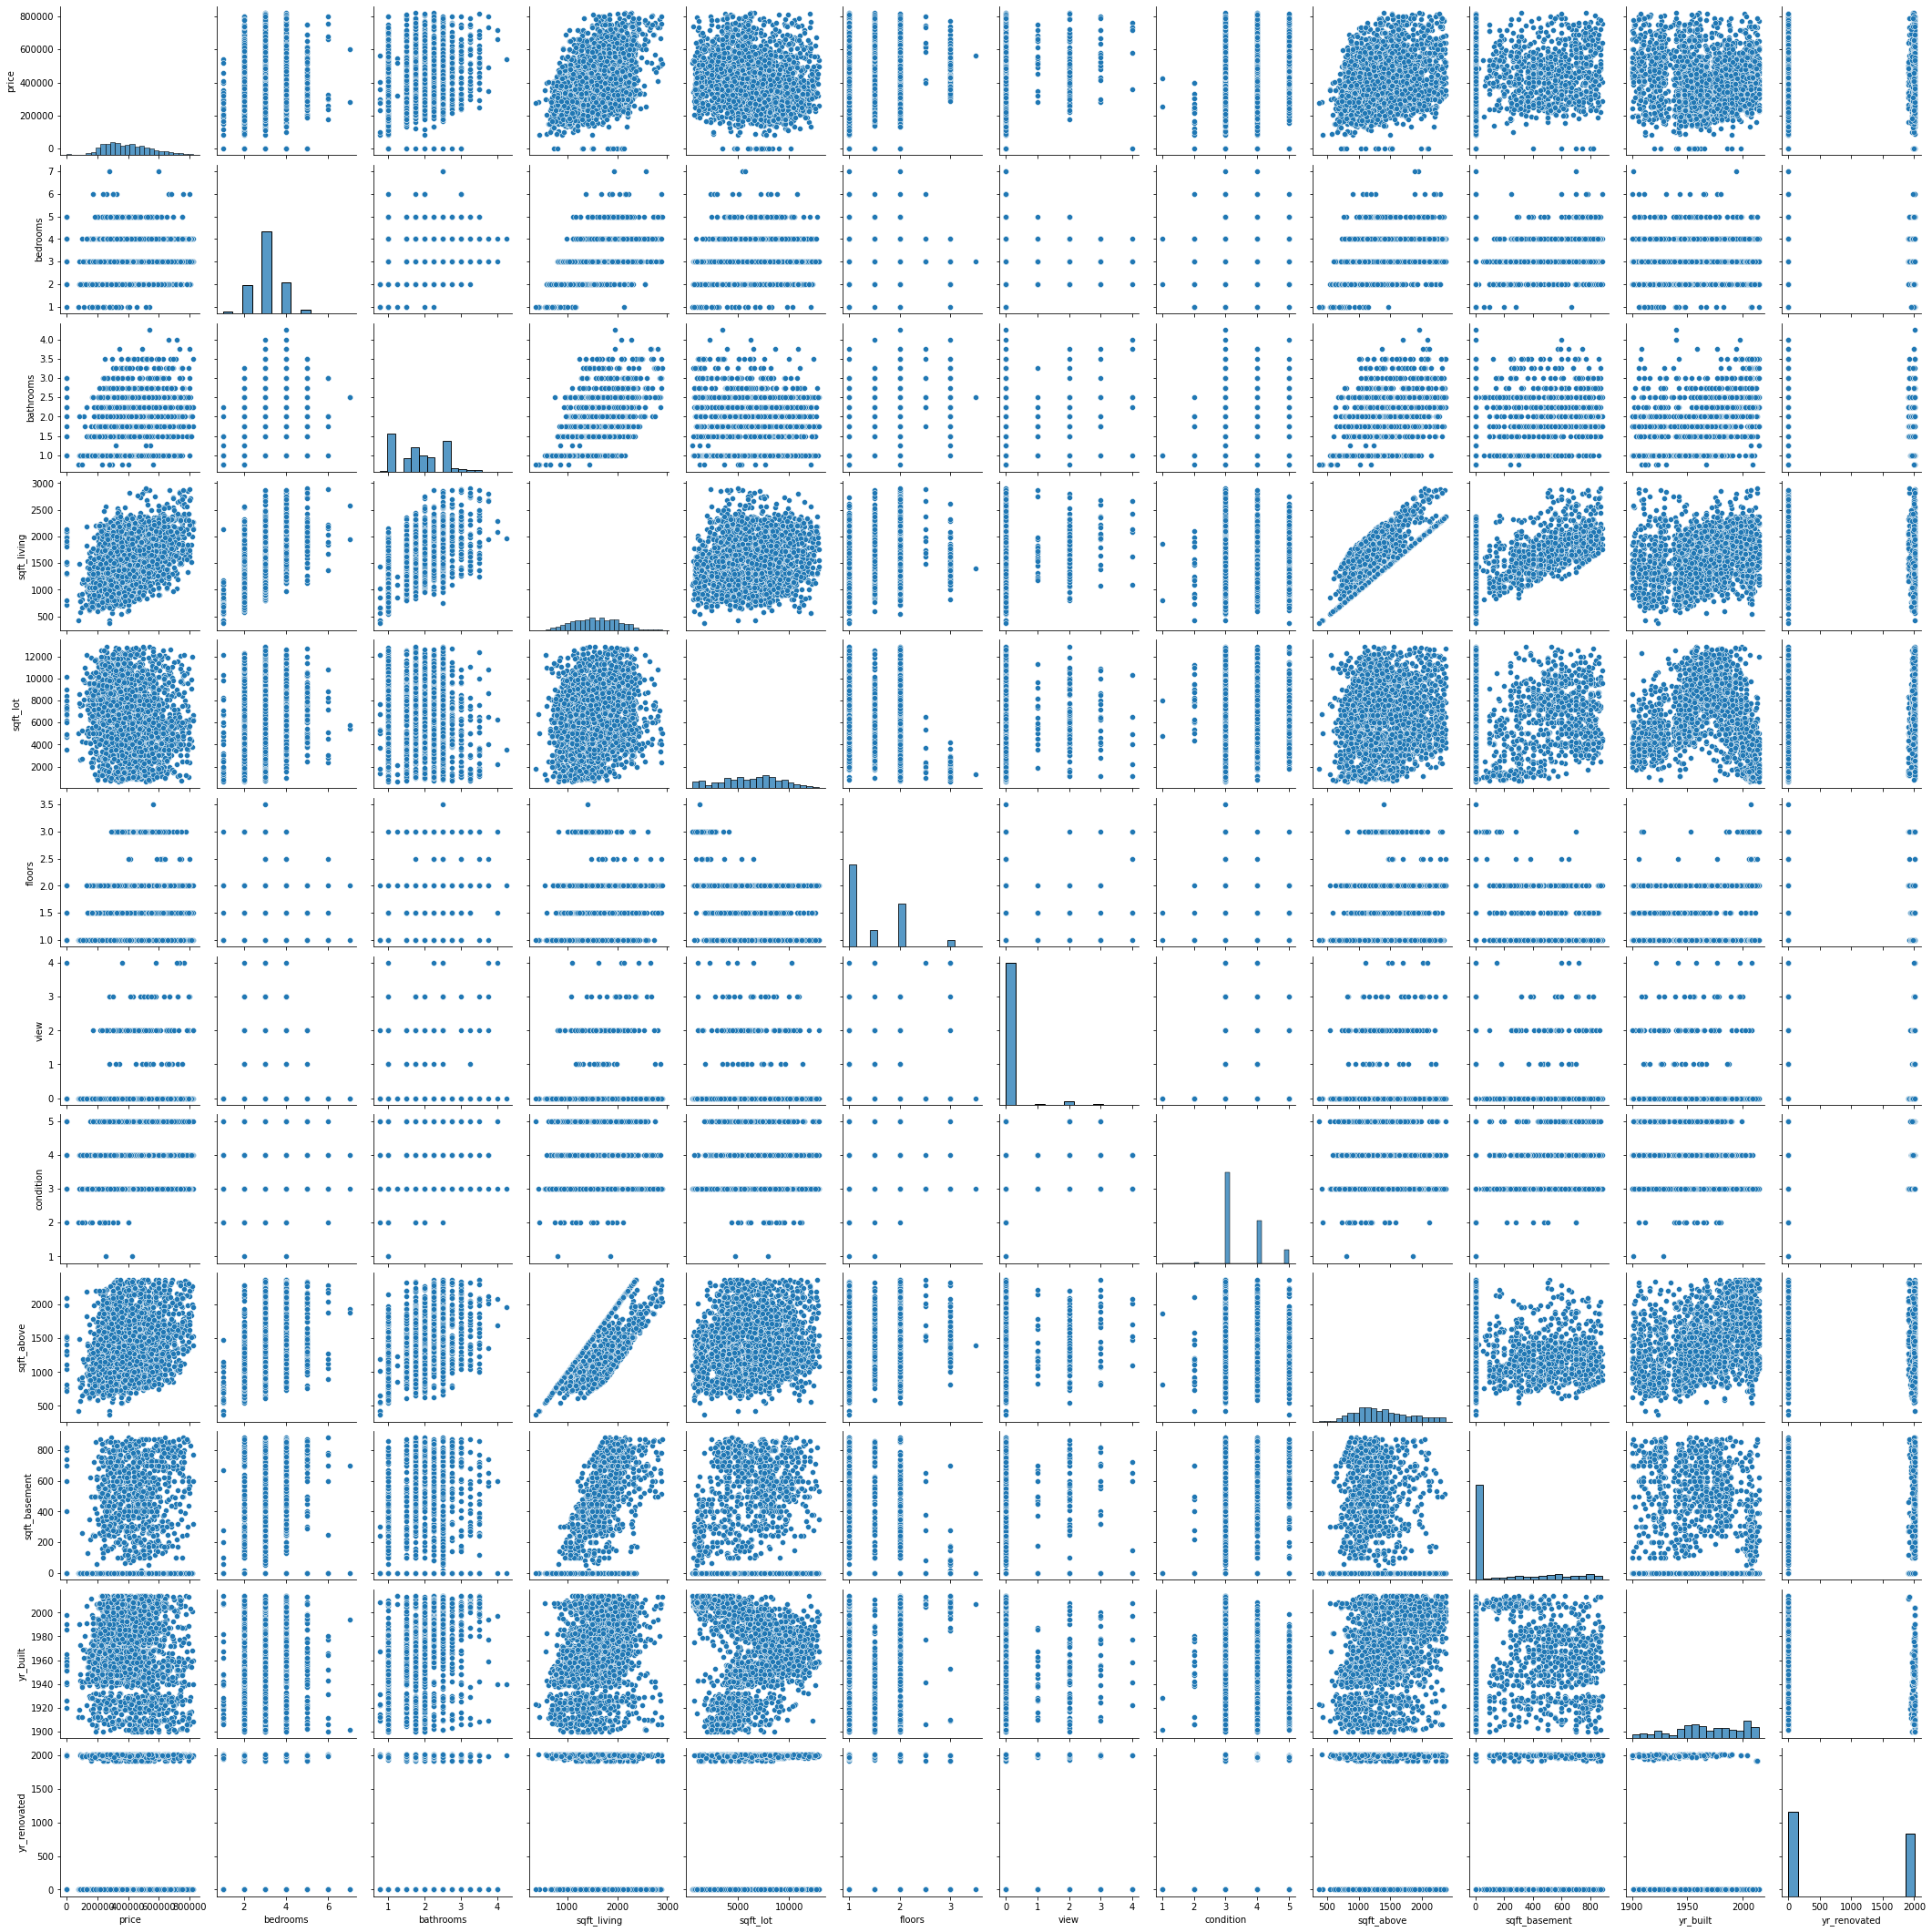

In [ ]:
plt.figure(figsize=(20,20))
sns.pairplot(datacl)

El mapa de calor nos facilita ver la correlacion que las variables tienen

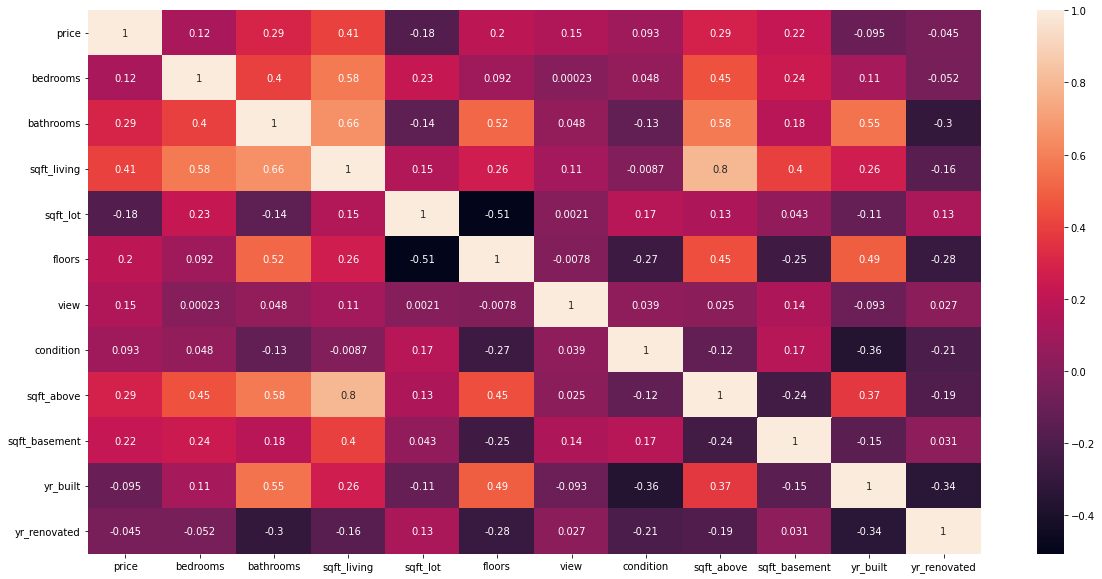

In [ ]:
correlacion = datacl.corr()
plt.figure(figsize=(20,10))
sns.heatmap(correlacion, annot=True)

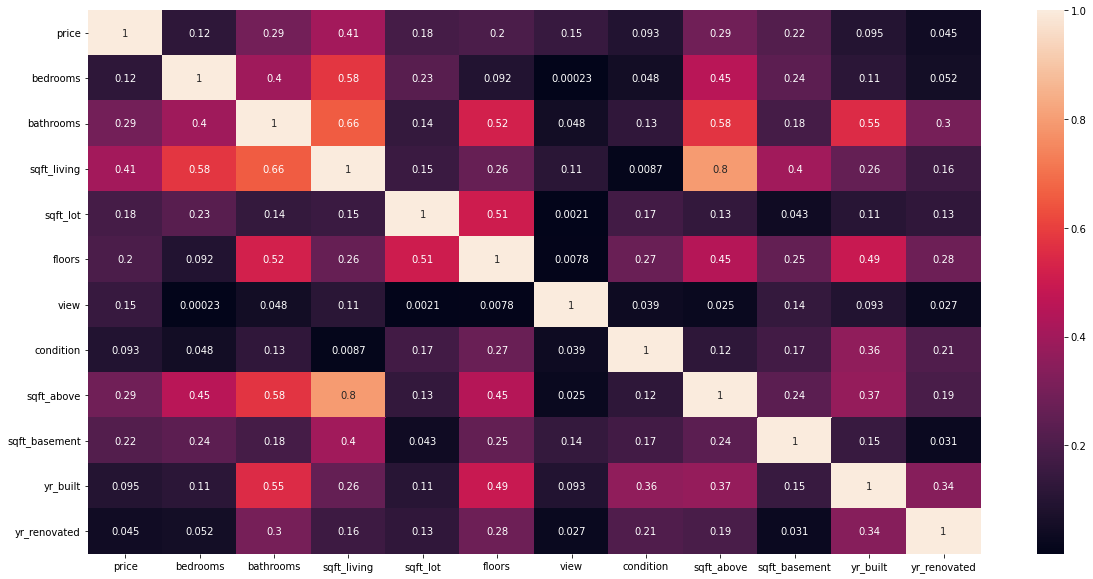

In [ ]:
# Mapa con valor absoluto
plt.figure(figsize=(20,10))
sns.heatmap(datacl.corr().abs(),annot = True)

In [ ]:
# Se ordenan las variables de acuerdo a su correlacion con price
precio = datacl.corr().abs()
precio = precio.loc[:,["price"]]
precio.sort_values(ascending=False, by= "price")

price
price          1.000000
sqft_living    0.406244
bathrooms      0.294666
sqft_above     0.286174
sqft_basement  0.218152
floors         0.198593
sqft_lot       0.181041
view           0.146390
bedrooms       0.122213
yr_built       0.094609
condition      0.093372
yr_renovated   0.045047

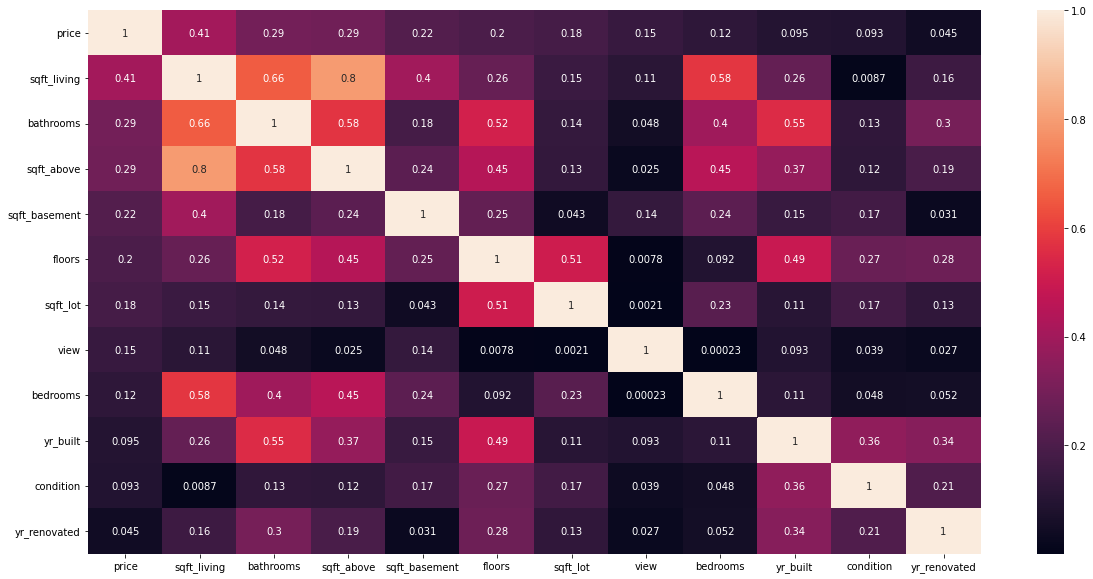

In [ ]:
# Se vuelve a crear un mapa de calor pero conj las variables ordenadas, con el fin de ver cuales son utiles y descartar aquellas que hagan ruido, es decir que esten correlacionadas entre ellas 
precio = datacl.loc[:,["price","sqft_living","bathrooms","sqft_above","sqft_basement","floors","sqft_lot","view","bedrooms","yr_built","condition","yr_renovated"]]
plt.figure(figsize=(20,10))
sns.heatmap(precio.corr().abs(),annot = True)

<Figure size 1440x720 with 0 Axes>

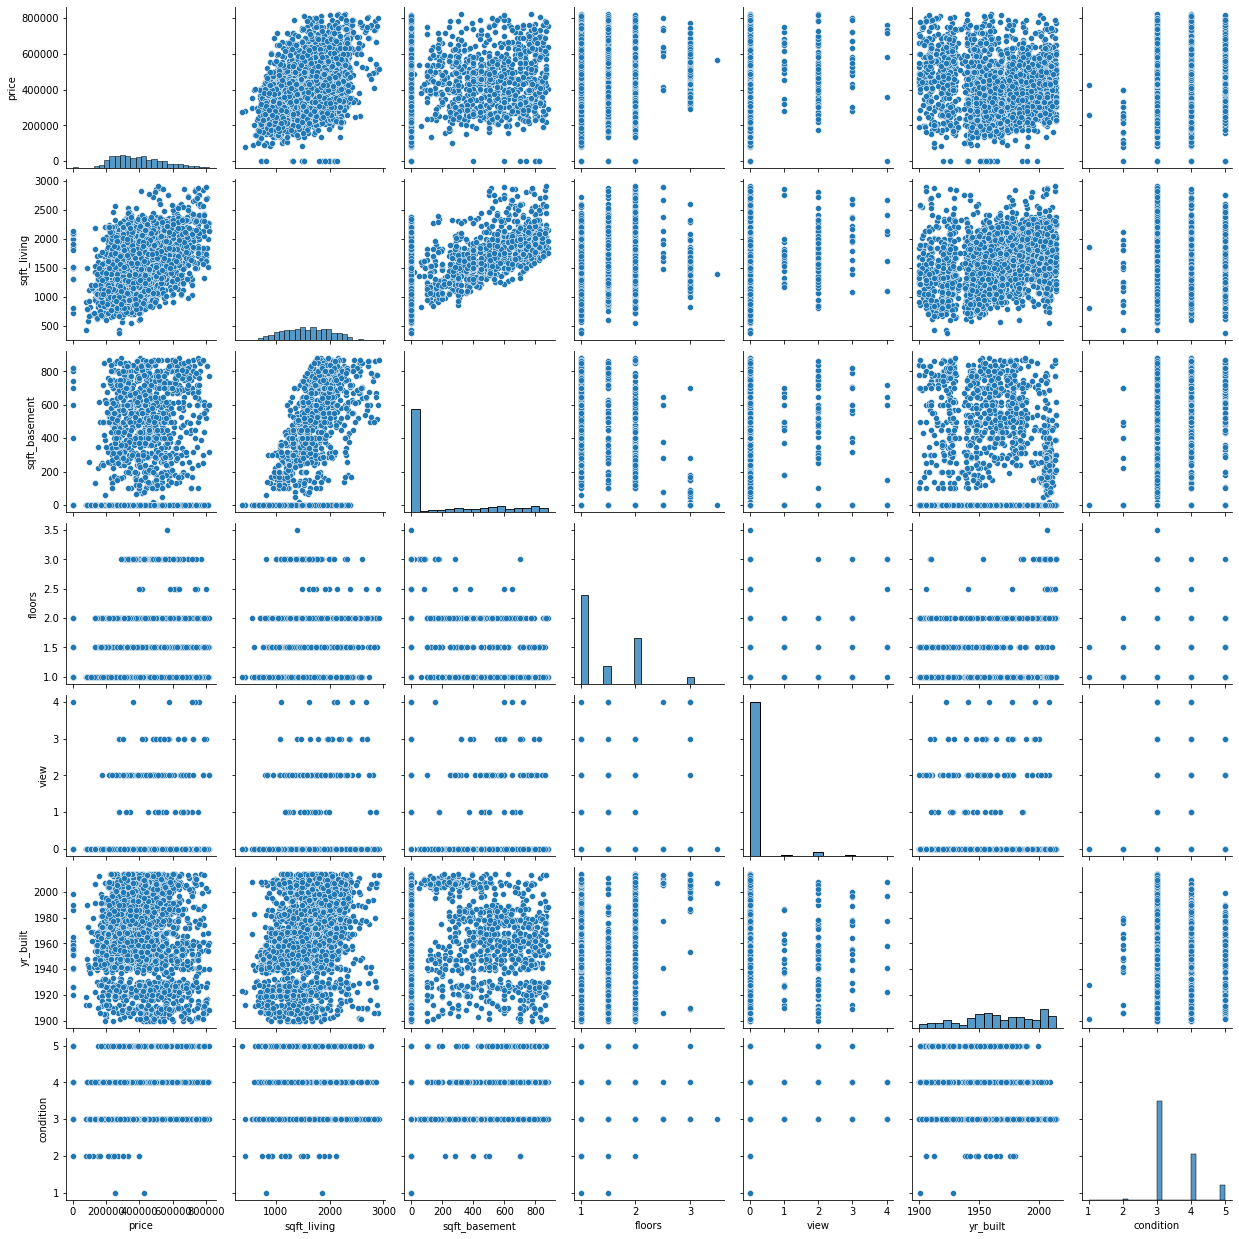

In [ ]:
train = datacl.loc[:,["price","sqft_living","sqft_basement","floors","view","yr_built","condition"]]
plt.figure(figsize=(20,10))
sns.pairplot(train) 

Por fines practicos s e eliminara la fecha debido a que se desconoce si es el momento en que se capturo el dato o no, pero no afecta a las demas 

In [ ]:
datacl.drop(columns=["date"],inplace=True)

# modelo de ml 1 
Con las variables numericas que tienen alta correlacion y no estan correlacionadas con otras (hacer ruido) se hara la prediccion del precio 

In [ ]:
x_hipot1 = datacl.loc[:,["sqft_living","sqft_basement","floors","yr_built"]]
y_hipot1 = datacl.loc[:,["price"]]

In [ ]:
# Preparamos tarin data y test data
x_hipot1_train, x_hipot1_test, y_hipot1_train, y_hipot1_test = train_test_split(x_hipot1, y_hipot1, test_size = 0.20, random_state = 43)

In [ ]:
# Regresion lineal
regresion_lineal.fit(x_hipot1_train,y_hipot1_train)


LinearRegression()

## Fase de validacion

In [ ]:
# predecimos lso valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(x_hipot1_train)

# Calculamos el error cuadratico medio (MSE)
mse_hipot1_train =  mean_squared_error(y_true = y_hipot1_train, y_pred = prediccion_entrenamiento)
print("Error cuadratico medio (MSE) Train: "+ str(mse_hipot1_train))

# Predecimos los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(x_hipot1_test)

# Calculamos el Error Cuadratico Medio (MSE)
mse_hipot1_test = mean_squared_error(y_true = y_hipot1_test, y_pred = prediccion_entrenamiento)
print("Error cuadratico medio (MSE) test: "+ str(mse_hipot1_test))

Error cuadratico medio (MSE) Train: 17549738503.725224
Error cuadratico medio (MSE) test: 18926684123.21421


# escalamiento
Se escalara el precio debido a que es muy variado su rango

In [ ]:
# se escala la variable charges para hacerla mas estandar
scaler = StandardScaler()

"""Los algortimos de preprocessing de skelearn estan preparados para convertir matrices pro lo que tenemos que hacer una transformacion de nuestra variable y ya que es una variable de tipo Series, 
para ello hacemos un .to_numpy que nos convierte la serie en un array y luego hacemos un reshape (-1,1) para transformar un array de 1xn en una matriz de nx1"""
y_hipot1 = scaler.fit_transform(y_hipot1.to_numpy().reshape(-1,1))
# Se vueolve a transformar nuestra variable en un array de 1xn
y_hipot1 = y_hipot1.reshape(1,-1)[0]

In [ ]:
x_hipot1_train, x_hipot1_test, y_hipot1_train, y_hipot1_test = train_test_split(x_hipot1, y_hipot1, test_size = 0.20, random_state = 43)

In [ ]:
# Regresion lineal
regresion_lineal.fit(x_hipot1_train,y_hipot1_train)

LinearRegression()

## Fase de validacion

In [ ]:
# predecimos lso valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(x_hipot1_train)

# Calculamos el error cuadratico medio (MSE)
mse_hipot1_train =  mean_squared_error(y_true = y_hipot1_train, y_pred = prediccion_entrenamiento)
print("Error cuadratico medio (MSE) Train: "+ str(mse_hipot1_train))

# Predecimos los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(x_hipot1_test)

# Calculamos el Error Cuadratico Medio (MSE)
mse_hipot1_test = mean_squared_error(y_true = y_hipot1_test, y_pred = prediccion_entrenamiento)
print("Error cuadratico medio (MSE) test: "+ str(mse_hipot1_test))

Error cuadratico medio (MSE) Train: 0.7296457803186158
Error cuadratico medio (MSE) test: 0.7868935028858254


In [ ]:
prediccion_hipot1 = regresion_lineal.predict(x_hipot1_test)
prediccion_hipot1 = pd.DataFrame(prediccion_hipot1)
# prediccion_hipot1.reset_index(drop = True, inplace = True)
# y_hipot1_test.reset_index(drop = True, inplace = True)
# df1 = y_hipot1_test.join(prediccion_hipot1) 

In [ ]:
prediccion_hipot1 = regresion_lineal.predict(x_hipot1_test)
prediccion_hipot1 = pd.DataFrame(prediccion_hipot1)
prediccion_hipot1.reset_index(drop = True, inplace = True)
y_hipot1_test=y_hipot1_test.tolist()
df = pd.DataFrame(y_hipot1_test, columns = ['y_hipot1_test'])
df1 = df.join(prediccion_hipot1) 
df1

y_hipot1_test         0
0        -0.278471 -0.290883
1         0.061658 -0.074661
2        -0.564495  0.339154
3         1.190047 -0.225106
4         0.480774  0.191766
..             ...       ...
500       0.093898  0.293854
501       1.415724  0.588094
502       2.265240  0.850702
503       0.564597  0.608723
504      -0.957116 -0.153982

[505 rows x 2 columns]

# modelo de ml 1.2 
Con las variables numericas se hara la prediccion del precio, esto para ver como afecta el ruido

In [ ]:
x_hipot12 = datacl.loc[:,["sqft_living","bathrooms","sqft_above","sqft_basement","floors","sqft_lot","bedrooms","yr_built","condition","yr_renovated"]]
y_hipot12 = datacl.loc[:,["price"]]

In [ ]:
# Preparamos tarin data y test data
x_hipot12_train, x_hipot12_test, y_hipot12_train, y_hipot12_test = train_test_split(x_hipot12, y_hipot12, test_size = 0.20, random_state = 43)

In [ ]:
# Regresion lineal
regresion_lineal.fit(x_hipot12_train,y_hipot12_train)

LinearRegression()

## Fase de validacion

In [ ]:
# predecimos lso valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(x_hipot12_train)

# Calculamos el error cuadratico medio (MSE)
mse_hipot12_train =  mean_squared_error(y_true = y_hipot12_train, y_pred = prediccion_entrenamiento)
print("Error cuadratico medio (MSE) Train 1: "+ str(mse_hipot1_train))
print("Error cuadratico medio (MSE) Train 1.2: "+ str(mse_hipot12_train))

# Predecimos los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(x_hipot12_test)

# Calculamos el Error Cuadratico Medio (MSE)
mse_hipot12_test = mean_squared_error(y_true = y_hipot12_test, y_pred = prediccion_entrenamiento)
print("Error cuadratico medio (MSE) test 1: "+ str(mse_hipot1_test))
print("Error cuadratico medio (MSE) test 1.2: "+ str(mse_hipot12_test))

Error cuadratico medio (MSE) Train 1: 0.7296457803186158
Error cuadratico medio (MSE) Train 1.2: 16089703595.08005
Error cuadratico medio (MSE) test 1: 0.7868935028858254
Error cuadratico medio (MSE) test 1.2: 17997518709.80598


# escalamienhto
Se escalara el precio debido a que es muy variado su rango

In [ ]:
# se escala la variable charges para hacerla mas estandar
scaler = StandardScaler()

"""Los algortimos de preprocessing de skelearn estan preparados para convertir matrices pro lo que tenemos que hacer una transformacion de nuestra variable y ya que es una variable de tipo Series, 
para ello hacemos un .to_numpy que nos convierte la serie en un array y luego hacemos un reshape (-1,1) para transformar un array de 1xn en una matriz de nx1"""
y_hipot12 = scaler.fit_transform(y_hipot12.to_numpy().reshape(-1,1))
# Se vueolve a transformar nuestra variable en un array de 1xn
y_hipot12 = y_hipot12.reshape(1,-1)[0]

In [ ]:
x_hipot12_train, x_hipot12_test, y_hipot12_train, y_hipot12_test = train_test_split(x_hipot12, y_hipot12, test_size = 0.20, random_state = 43)

In [ ]:
# Regresion lineal
regresion_lineal.fit(x_hipot12_train,y_hipot12_train)

LinearRegression()

## Fase de validacion

In [ ]:
# predecimos lso valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(x_hipot12_train)

# Calculamos el error cuadratico medio (MSE)
mse_hipot12_train =  mean_squared_error(y_true = y_hipot12_train, y_pred = prediccion_entrenamiento)
print("Error cuadratico medio (MSE) Train 1: "+ str(mse_hipot1_train))
print("Error cuadratico medio (MSE) Train 1.2: "+ str(mse_hipot12_train))

# Predecimos los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(x_hipot12_test)

# Calculamos el Error Cuadratico Medio (MSE)
mse_hipot12_test = mean_squared_error(y_true = y_hipot12_test, y_pred = prediccion_entrenamiento)
print("Error cuadratico medio (MSE) test 1: "+ str(mse_hipot1_test))
print("Error cuadratico medio (MSE) test 1.2: "+ str(mse_hipot12_test))

Error cuadratico medio (MSE) Train 1: 0.7296457803186158
Error cuadratico medio (MSE) Train 1.2: 0.6689435476337984
Error cuadratico medio (MSE) test 1: 0.7868935028858254
Error cuadratico medio (MSE) test 1.2: 0.7482626353679198


In [ ]:
prediccion_hipot12 = regresion_lineal.predict(x_hipot12_test)
prediccion_hipot12 = pd.DataFrame(prediccion_hipot12)
prediccion_hipot12.reset_index(drop = True, inplace = True)
y_hipot12_test=y_hipot12_test.tolist()
df12 = pd.DataFrame(y_hipot12_test, columns = ['y_hipot12_test'])
df12 = df12.join(prediccion_hipot1) 
df12

y_hipot12_test         0
0         -0.278471 -0.290883
1          0.061658 -0.074661
2         -0.564495  0.339154
3          1.190047 -0.225106
4          0.480774  0.191766
..              ...       ...
500        0.093898  0.293854
501        1.415724  0.588094
502        2.265240  0.850702
503        0.564597  0.608723
504       -0.957116 -0.153982

[505 rows x 2 columns]

Se puede ver como el ruido provoca menos excatitud con el error cuadratico medio, si bine son muchas graficas vale la pena hacerlas para poder ver estos ruidos 

# modelo de ml 2  
Con variables categoricas se intentara de predecir el costo de la vivienda

In [ ]:
for col in datacl.columns:
  print(col +" "+ str(datacl[col].dtype))

price float64
bedrooms float64
bathrooms float64
sqft_living int64
sqft_lot int64
floors float64
view int64
condition int64
sqft_above int64
sqft_basement int64
yr_built int64
yr_renovated int64
street object
city object
statezip object


In [ ]:
datacl

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  view  \
0     313000.000000       3.0       1.50         1340      7912     1.5     0   
2     342000.000000       3.0       2.00         1930     11947     1.0     0   
4     550000.000000       4.0       2.50         1940     10500     1.0     0   
5     490000.000000       2.0       1.00          880      6380     1.0     0   
6     335000.000000       2.0       2.00         1350      2560     1.0     0   
...             ...       ...        ...          ...       ...     ...   ...   
4589  182805.000000       3.0       1.00         1040      8892     1.0     0   
4594  210614.285714       3.0       2.50         1610      7223     2.0     0   
4595  308166.666667       3.0       1.75         1510      6360     1.0     0   
4596  534333.333333       3.0       2.50         1460      7573     2.0     0   
4599  220600.000000       3.0       2.50         1490      8102     2.0     0   

      condition  sqft_above  sqft_basement  yr_built  yr_renovated  \
0             3        1340              0      1955          2005   
2             4        1930              0      1966             0   
4             4        1140            800      1976          1992   
5             3         880              0      1938          1994   
6             3        1350              0      1976             0   
...         ...         ...            ...       ...           ...   
4589          4         800            240      1958          1972   
4594          3        1610              0      1994             0   
4595          4        1510              0      1954          1979   
4596          3        1460              0      1983          2009   
4599          4        1490              0      1990             0   

                        street         city  statezip  
0         18810 Densmore Ave N    Shoreline  WA 98133  
2     26206-26214 143rd Ave SE         Kent  WA 98042  
4            9105 170th Ave NE      Redmond  WA 98052  
5               522 NE 88th St      Seattle  WA 98115  
6            2616 174th Ave NE      Redmond  WA 98052  
...                        ...          ...       ...  
4589          1028 SW 307th St  Federal Way  WA 98023  
4594        26306 127th Ave SE         Kent  WA 98030  
4595            501 N 143rd St      Seattle  WA 98133  
4596          14855 SE 10th Pl     Bellevue  WA 98007  
4599         18717 SE 258th St    Covington  WA 98042  

[2523 rows x 15 columns]

In [ ]:
categorical_columns = ["view","street","condition","city","statezip"]

In [ ]:
# Preparamos el dataset de la hipotesis 2
categorical_columns_hipot2 = pd.get_dummies(data = datacl, prefix = "Home", prefix_sep = "_", columns = categorical_columns, drop_first=True, dtype = "int8")

In [ ]:
categorical_columns_hipot2

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0     313000.000000       3.0       1.50         1340      7912     1.5   
2     342000.000000       3.0       2.00         1930     11947     1.0   
4     550000.000000       4.0       2.50         1940     10500     1.0   
5     490000.000000       2.0       1.00          880      6380     1.0   
6     335000.000000       2.0       2.00         1350      2560     1.0   
...             ...       ...        ...          ...       ...     ...   
4589  182805.000000       3.0       1.00         1040      8892     1.0   
4594  210614.285714       3.0       2.50         1610      7223     2.0   
4595  308166.666667       3.0       1.75         1510      6360     1.0   
4596  534333.333333       3.0       2.50         1460      7573     2.0   
4599  220600.000000       3.0       2.50         1490      8102     2.0   

      sqft_above  sqft_basement  yr_built  yr_renovated  Home_1  Home_2  \
0           1340              0      1955          2005       0       0   
2           1930              0      1966             0       0       0   
4           1140            800      1976          1992       0       0   
5            880              0      1938          1994       0       0   
6           1350              0      1976             0       0       0   
...          ...            ...       ...           ...     ...     ...   
4589         800            240      1958          1972       0       0   
4594        1610              0      1994             0       0       0   
4595        1510              0      1954          1979       0       0   
4596        1460              0      1983          2009       0       0   
4599        1490              0      1990             0       0       0   

      Home_3  Home_4  Home_10 W Etruria St  Home_100 20th Ave E  \
0          0       0                     0                    0   
2          0       0                     0                    0   
4          0       0                     0                    0   
5          0       0                     0                    0   
6          0       0                     0                    0   
...      ...     ...                   ...                  ...   
4589       0       0                     0                    0   
4594       0       0                     0                    0   
4595       0       0                     0                    0   
4596       0       0                     0                    0   
4599       0       0                     0                    0   

      Home_100 24th Ave E  Home_1000 Mountain View Blvd SE  \
0                       0                                0   
2                       0                                0   
4                       0                                0   
5                       0                                0   
6                       0                                0   
...                   ...                              ...   
4589                    0                                0   
4594                    0                                0   
4595                    0                                0   
4596                    0                                0   
4599                    0                                0   

      Home_10000-10026 S 100th St  Home_10005 16th Ave S  \
0                               0                      0   
2                               0                      0   
4                               0                      0   
5                               0                      0   
6                               0                      0   
...                           ...                    ...   
4589                            0                      0   
4594                            0                      0   
4595                            0                      0   
4596                            0                      0   
45

In [ ]:
x_hipot2 = categorical_columns_hipot2.drop("price",axis = 1) #Variables independientes
y_hipot2 = categorical_columns_hipot2["price"] # Variable dependiente

In [ ]:
# se escala la variable charges para hacerla mas estandar
scaler = StandardScaler()

"""Los algortimos de preprocessing de skelearn estan preparados para convertir matrices pro lo que tenemos que hacer una transformacion de nuestra variable y ya que es una variable de tipo Series, 
para ello hacemos un .to_numpy que nos convierte la serie en un array y luego hacemos un reshape (-1,1) para transformar un array de 1xn en una matriz de nx1"""
y_hipot2 = scaler.fit_transform(y_hipot2.to_numpy().reshape(-1,1))
# Se vueolve a transformar nuestra variable en un array de 1xn
y_hipot2 = y_hipot2.reshape(1,-1)[0]

In [ ]:
# Preparamos tarin data y test data
x_hipot2_train, x_hipot2_test, y_hipot2_train, y_hipot2_test = train_test_split(x_hipot2, y_hipot2, test_size = 0.20, random_state = 43)

In [ ]:
# Regresion lineal
regresion_lineal.fit(x_hipot2_train,y_hipot2_train)

LinearRegression()

## Fase de validacion

In [ ]:
# predecimos los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(x_hipot2_train)


# Calculamos el error cuadratico medio (MSE)
mse_hipot2_train =  mean_squared_error(y_true = y_hipot2_train, y_pred = prediccion_entrenamiento)
print("Error cuadratico medio (MSE) Train 1: "+ str(mse_hipot1_train))
print("Error cuadratico medio (MSE) Train 1.2: "+ str(mse_hipot12_train))
print("Error cuadratico medio (MSE) Train 2: "+ str(mse_hipot2_train))


# Predecimos los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(x_hipot2_test)

# Calculamos el Error Cuadratico Medio (MSE)
mse_hipot2_test = mean_squared_error(y_true = y_hipot2_test, y_pred = prediccion_entrenamiento)
print("Error cuadratico medio (MSE) test 1: "+ str(mse_hipot1_test))
print("Error cuadratico medio (MSE) test 1.2: "+ str(mse_hipot12_test))
print("Error cuadratico medio (MSE) test 2: "+ str(mse_hipot2_test))

Error cuadratico medio (MSE) Train 1: 0.7296457803186158
Error cuadratico medio (MSE) Train 1.2: 0.6689435476337984
Error cuadratico medio (MSE) Train 2: 0.0001620013155163762
Error cuadratico medio (MSE) test 1: 0.7868935028858254
Error cuadratico medio (MSE) test 1.2: 0.7482626353679198
Error cuadratico medio (MSE) test 2: 0.4227721531312874


In [ ]:
prediccion_hipot2 = regresion_lineal.predict(x_hipot2_test)
prediccion_hipot2 = pd.DataFrame(prediccion_hipot2)
prediccion_hipot2.reset_index(drop = True, inplace = True)
y_hipot2_test=y_hipot2_test.tolist()
df2 = pd.DataFrame(y_hipot2_test, columns = ['y_hipot2_test'])
df2 = df2.join(prediccion_hipot2) 
df2

y_hipot2_test         0
0        -0.278471 -0.657560
1         0.061658  0.171210
2        -0.564495  0.635994
3         1.190047  0.192619
4         0.480774  0.779771
..             ...       ...
500       0.093898  0.033700
501       1.415724  1.563597
502       2.265240  2.124375
503       0.564597  1.167038
504      -0.957116 -1.465868

[505 rows x 2 columns]

Con las variables categoricas no se puede predecir el precio de la vivienda, por lo cual se vera si juntando las varaibles categoricas de city, condition y zip se puede mejorar junto con las numericas. Que el train este muy por debajo del test puede significar que el aprendizaje costo mucho esfuerzo y a la hora de testearlo las variables fueron mas faciles

# Test 3

In [ ]:
categorical_columns = ["condition","city","statezip"]

In [ ]:
# Preparamos el dataset de la hipotesis 3
categorical_columns_hipot3 = pd.get_dummies(data = datacl, prefix = "Home", prefix_sep = "_", columns = categorical_columns, drop_first=True, dtype = "int8")

In [ ]:
categorical_columns_hipot3

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  view  \
0     313000.000000       3.0       1.50         1340      7912     1.5     0   
2     342000.000000       3.0       2.00         1930     11947     1.0     0   
4     550000.000000       4.0       2.50         1940     10500     1.0     0   
5     490000.000000       2.0       1.00          880      6380     1.0     0   
6     335000.000000       2.0       2.00         1350      2560     1.0     0   
...             ...       ...        ...          ...       ...     ...   ...   
4589  182805.000000       3.0       1.00         1040      8892     1.0     0   
4594  210614.285714       3.0       2.50         1610      7223     2.0     0   
4595  308166.666667       3.0       1.75         1510      6360     1.0     0   
4596  534333.333333       3.0       2.50         1460      7573     2.0     0   
4599  220600.000000       3.0       2.50         1490      8102     2.0     0   

      sqft_above  sqft_basement  yr_built  yr_renovated  \
0           1340              0      1955          2005   
2           1930              0      1966             0   
4           1140            800      1976          1992   
5            880              0      1938          1994   
6           1350              0      1976             0   
...          ...            ...       ...           ...   
4589         800            240      1958          1972   
4594        1610              0      1994             0   
4595        1510              0      1954          1979   
4596        1460              0      1983          2009   
4599        1490              0      1990             0   

                        street  Home_2  Home_3  Home_4  Home_5  Home_Auburn  \
0         18810 Densmore Ave N       0       1       0       0            0   
2     26206-26214 143rd Ave SE       0       0       1       0            0   
4            9105 170th Ave NE       0       0       1       0            0   
5               522 NE 88th St       0       1       0       0            0   
6            2616 174th Ave NE       0       1       0       0            0   
...                        ...     ...     ...     ...     ...          ...   
4589          1028 SW 307th St       0       0       1       0            0   
4594        26306 127th Ave SE       0       1       0       0            0   
4595            501 N 143rd St       0       0       1       0            0   
4596          14855 SE 10th Pl       0       1       0       0            0   
4599         18717 SE 258th St       0       0       1       0            0   

      Home_Beaux Arts Village  Home_Bellevue  Home_Black Diamond  \
0                           0              0                   0   
2                           0              0                   0   
4                           0              0                   0   
5                           0              0                   0   
6                           0              0                   0   
...                       ...            ...                 ...   
4589                        0              0                   0   
4594                        0              0                   0   
4595                        0              0                   0   
4596                        0              1                   0   
4599                        0              0                   0   

      Home_Bothell  Home_Burien  Home_Carnation  Home_Covington  \
0                0            0               0               0   
2                0            0               0               0   
4                0            0               0               0   
5                0            0               0               0   
6                0            0               0               0   
...            ...          ...             ...             ...   
4589             0            0               0               0   
4594             0            

In [ ]:
x_hipot3 = categorical_columns_hipot3.drop(["price","bedrooms","bathrooms","sqft_lot","sqft_above","yr_renovated","street"],axis = 1) #Variables independientes
y_hipot3 = categorical_columns_hipot3["price"] # Variable dependiente

In [ ]:
x_hipot3

sqft_living  floors  view  sqft_basement  yr_built  Home_2  Home_3  \
0            1340     1.5     0              0      1955       0       1   
2            1930     1.0     0              0      1966       0       0   
4            1940     1.0     0            800      1976       0       0   
5             880     1.0     0              0      1938       0       1   
6            1350     1.0     0              0      1976       0       1   
...           ...     ...   ...            ...       ...     ...     ...   
4589         1040     1.0     0            240      1958       0       0   
4594         1610     2.0     0              0      1994       0       1   
4595         1510     1.0     0              0      1954       0       0   
4596         1460     2.0     0              0      1983       0       1   
4599         1490     2.0     0              0      1990       0       0   

      Home_4  Home_5  Home_Auburn  Home_Beaux Arts Village  Home_Bellevue  \
0          0       0            0                        0              0   
2          1       0            0                        0              0   
4          1       0            0                        0              0   
5          0       0            0                        0              0   
6          0       0            0                        0              0   
...      ...     ...          ...                      ...            ...   
4589       1       0            0                        0              0   
4594       0       0            0                        0              0   
4595       1       0            0                        0              0   
4596       0       0            0                        0              1   
4599       1       0            0                        0              0   

      Home_Black Diamond  Home_Bothell  Home_Burien  Home_Carnation  \
0                      0             0            0               0   
2                      0             0            0               0   
4                      0             0            0               0   
5                      0             0            0               0   
6                      0             0            0               0   
...                  ...           ...          ...             ...   
4589                   0             0            0               0   
4594                   0             0            0               0   
4595                   0             0            0               0   
4596                   0             0            0               0   
4599                   0             0            0               0   

      Home_Covington  Home_Des Moines  Home_Duvall  Home_Enumclaw  \
0                  0                0            0              0   
2                  0                0            0              0   
4                  0                0            0              0   
5                  0                0            0              0   
6                  0                0            0              0   
...              ...              ...          ...            ...   
4589               0                0            0              0   
4594               0                0            0              0   
4595               0                0            0              0   
4596               0                0            0              0   
4599               1                0            0              0   

      Home_Fall City  Home_Federal Way  Home_Inglewood-Finn Hill  \
0                  0                 0                         0   
2                  0                 0                         0   
4                  0                 0                         0   
5                  0                 0                         0   
6                  0                 0                         0   
...              ...               ...                       ...   
4589      

In [ ]:
# se escala la variable charges para hacerla mas estandar
scaler = StandardScaler()

"""Los algortimos de preprocessing de skelearn estan preparados para convertir matrices pro lo que tenemos que hacer una transformacion de nuestra variable y ya que es una variable de tipo Series, 
para ello hacemos un .to_numpy que nos convierte la serie en un array y luego hacemos un reshape (-1,1) para transformar un array de 1xn en una matriz de nx1"""
y_hipot3 = scaler.fit_transform(y_hipot3.to_numpy().reshape(-1,1))
# Se vueolve a transformar nuestra variable en un array de 1xn
y_hipot3 = y_hipot3.reshape(1,-1)[0]

In [ ]:
# Preparamos tarin data y test data
x_hipot3_train, x_hipot3_test, y_hipot3_train, y_hipot3_test = train_test_split(x_hipot3, y_hipot3, test_size = 0.20, random_state = 43)

In [ ]:
# Regresion lineal
regresion_lineal.fit(x_hipot3_train,y_hipot3_train)

LinearRegression()

## Fase de validacion

In [ ]:
# predecimos los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(x_hipot3_train)


# Calculamos el error cuadratico medio (MSE)
mse_hipot3_train =  mean_squared_error(y_true = y_hipot3_train, y_pred = prediccion_entrenamiento)
print("Error cuadratico medio (MSE) Train 1: "+ str(mse_hipot1_train))
print("Error cuadratico medio (MSE) Train 1.2: "+ str(mse_hipot12_train))
print("Error cuadratico medio (MSE) Train 2: "+ str(mse_hipot2_train))
print("Error cuadratico medio (MSE) Train 3: "+ str(mse_hipot3_train))



# Predecimos los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(x_hipot3_test)

# Calculamos el Error Cuadratico Medio (MSE)
mse_hipot3_test = mean_squared_error(y_true = y_hipot3_test, y_pred = prediccion_entrenamiento)
print("Error cuadratico medio (MSE) test 1: "+ str(mse_hipot1_test))
print("Error cuadratico medio (MSE) test 1.2: "+ str(mse_hipot12_test))
print("Error cuadratico medio (MSE) test 2: "+ str(mse_hipot2_test))
print("Error cuadratico medio (MSE) test 3: "+ str(mse_hipot3_test))

Error cuadratico medio (MSE) Train 1: 0.7296457803186158
Error cuadratico medio (MSE) Train 1.2: 0.6689435476337984
Error cuadratico medio (MSE) Train 2: 0.0001620013155163762
Error cuadratico medio (MSE) Train 3: 0.2503287129304015
Error cuadratico medio (MSE) test 1: 0.7868935028858254
Error cuadratico medio (MSE) test 1.2: 0.7482626353679198
Error cuadratico medio (MSE) test 2: 0.4227721531312874
Error cuadratico medio (MSE) test 3: 0.2526433605373495


In [ ]:
prediccion_hipot3 = regresion_lineal.predict(x_hipot3_test)
prediccion_hipot3 = pd.DataFrame(prediccion_hipot3)
prediccion_hipot3.reset_index(drop = True, inplace = True)
y_hipot3_test=y_hipot3_test.tolist()
df3 = pd.DataFrame(y_hipot3_test, columns = ['y_hipot3_test'])
df3 = df3.join(prediccion_hipot3) 
df3

y_hipot3_test         0
0        -0.278471 -0.041672
1         0.061658  0.646893
2        -0.564495 -0.489265
3         1.190047  0.755438
4         0.480774  0.488156
..             ...       ...
500       0.093898 -0.161691
501       1.415724  1.442031
502       2.265240  1.715714
503       0.564597  1.371302
504      -0.957116 -0.895641

[505 rows x 2 columns]

Al juntar las variables menos que la anterior hipotesis, esto se puede deber los rangos que hay, por lo cual se volvera a intentar pero ahora con view y condition que no disponen de tantos calores como las otras variables categoricas.

# Test 4

In [ ]:
categorical_columns = ["condition","view"]

In [ ]:
# Preparamos el dataset de la hipotesis 2
categorical_columns_hipot4 = pd.get_dummies(data = datacl, prefix = "Home", prefix_sep = "_", columns = categorical_columns, drop_first=True, dtype = "int8")

In [ ]:
categorical_columns_hipot4

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0     313000.000000       3.0       1.50         1340      7912     1.5   
2     342000.000000       3.0       2.00         1930     11947     1.0   
4     550000.000000       4.0       2.50         1940     10500     1.0   
5     490000.000000       2.0       1.00          880      6380     1.0   
6     335000.000000       2.0       2.00         1350      2560     1.0   
...             ...       ...        ...          ...       ...     ...   
4589  182805.000000       3.0       1.00         1040      8892     1.0   
4594  210614.285714       3.0       2.50         1610      7223     2.0   
4595  308166.666667       3.0       1.75         1510      6360     1.0   
4596  534333.333333       3.0       2.50         1460      7573     2.0   
4599  220600.000000       3.0       2.50         1490      8102     2.0   

      sqft_above  sqft_basement  yr_built  yr_renovated  \
0           1340              0      1955          2005   
2           1930              0      1966             0   
4           1140            800      1976          1992   
5            880              0      1938          1994   
6           1350              0      1976             0   
...          ...            ...       ...           ...   
4589         800            240      1958          1972   
4594        1610              0      1994             0   
4595        1510              0      1954          1979   
4596        1460              0      1983          2009   
4599        1490              0      1990             0   

                        street         city  statezip  Home_2  Home_3  Home_4  \
0         18810 Densmore Ave N    Shoreline  WA 98133       0       1       0   
2     26206-26214 143rd Ave SE         Kent  WA 98042       0       0       1   
4            9105 170th Ave NE      Redmond  WA 98052       0       0       1   
5               522 NE 88th St      Seattle  WA 98115       0       1       0   
6            2616 174th Ave NE      Redmond  WA 98052       0       1       0   
...                        ...          ...       ...     ...     ...     ...   
4589          1028 SW 307th St  Federal Way  WA 98023       0       0       1   
4594        26306 127th Ave SE         Kent  WA 98030       0       1       0   
4595            501 N 143rd St      Seattle  WA 98133       0       0       1   
4596          14855 SE 10th Pl     Bellevue  WA 98007       0       1       0   
4599         18717 SE 258th St    Covington  WA 98042       0       0       1   

      Home_5  Home_1  Home_2  Home_3  Home_4  
0          0       0       0       0       0  
2          0       0       0       0       0  
4          0       0       0       0       0  
5          0       0       0       0       0  
6          0       0       0       0       0  
...      ...     ...     ...     ...     ...  
4589       0       0       0       0       0  
4594       0       0       0       0       0  
4595       0       0       0       0       0  
4596       0       0       0       0       0  
4599       0       0       0       0       0  

[2523 rows x 21 columns]

In [ ]:
"sqft_living","sqft_basement","floors","yr_built"

('sqft_living', 'sqft_basement', 'floors', 'yr_built')

In [ ]:
x_hipot4 = categorical_columns_hipot4.drop(["price","bedrooms","bathrooms","sqft_lot","sqft_above","yr_renovated","street","city","statezip"],axis = 1) #Variables independientes
y_hipot4 = categorical_columns_hipot4["price"] # Variable dependiente

In [ ]:
x_hipot4

sqft_living  floors  sqft_basement  yr_built  Home_2  Home_3  Home_4  \
0            1340     1.5              0      1955       0       1       0   
2            1930     1.0              0      1966       0       0       1   
4            1940     1.0            800      1976       0       0       1   
5             880     1.0              0      1938       0       1       0   
6            1350     1.0              0      1976       0       1       0   
...           ...     ...            ...       ...     ...     ...     ...   
4589         1040     1.0            240      1958       0       0       1   
4594         1610     2.0              0      1994       0       1       0   
4595         1510     1.0              0      1954       0       0       1   
4596         1460     2.0              0      1983       0       1       0   
4599         1490     2.0              0      1990       0       0       1   

      Home_5  Home_1  Home_2  Home_3  Home_4  
0          0       0       0       0       0  
2          0       0       0       0       0  
4          0       0       0       0       0  
5          0       0       0       0       0  
6          0       0       0       0       0  
...      ...     ...     ...     ...     ...  
4589       0       0       0       0       0  
4594       0       0       0       0       0  
4595       0       0       0       0       0  
4596       0       0       0       0       0  
4599       0       0       0       0       0  

[2523 rows x 12 columns]

In [ ]:
# se escala la variable charges para hacerla mas estandar
scaler = StandardScaler()

"""Los algortimos de preprocessing de skelearn estan preparados para convertir matrices pro lo que tenemos que hacer una transformacion de nuestra variable y ya que es una variable de tipo Series, 
para ello hacemos un .to_numpy que nos convierte la serie en un array y luego hacemos un reshape (-1,1) para transformar un array de 1xn en una matriz de nx1"""
y_hipot4 = scaler.fit_transform(y_hipot4.to_numpy().reshape(-1,1))
# Se vueolve a transformar nuestra variable en un array de 1xn
y_hipot4 = y_hipot4.reshape(1,-1)[0]

In [ ]:
# Preparamos tarin data y test data
x_hipot4_train, x_hipot4_test, y_hipot4_train, y_hipot4_test = train_test_split(x_hipot4, y_hipot4, test_size = 0.20, random_state = 43)

In [ ]:
# Regresion lineal
regresion_lineal.fit(x_hipot4_train,y_hipot4_train)

LinearRegression()

## Fase de validacion

In [ ]:
# predecimos los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(x_hipot4_train)


# Calculamos el error cuadratico medio (MSE)
mse_hipot4_train =  mean_squared_error(y_true = y_hipot4_train, y_pred = prediccion_entrenamiento)
print("Error cuadratico medio (MSE) Train 1: "+ str(mse_hipot1_train))
print("Error cuadratico medio (MSE) Train 1.2: "+ str(mse_hipot12_train))
print("Error cuadratico medio (MSE) Train 2: "+ str(mse_hipot2_train))
print("Error cuadratico medio (MSE) Train 3: "+ str(mse_hipot3_train))
print("Error cuadratico medio (MSE) Train 4: "+ str(mse_hipot4_train))




# Predecimos los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(x_hipot4_test)

# Calculamos el Error Cuadratico Medio (MSE)
mse_hipot4_test = mean_squared_error(y_true = y_hipot4_test, y_pred = prediccion_entrenamiento)
print("Error cuadratico medio (MSE) test 1: "+ str(mse_hipot1_test))
print("Error cuadratico medio (MSE) test 1.2: "+ str(mse_hipot12_test))
print("Error cuadratico medio (MSE) test 2: "+ str(mse_hipot2_test))
print("Error cuadratico medio (MSE) test 3: "+ str(mse_hipot3_test))
print("Error cuadratico medio (MSE) test 4: "+ str(mse_hipot4_test))

Error cuadratico medio (MSE) Train 1: 0.7296457803186158
Error cuadratico medio (MSE) Train 1.2: 0.6689435476337984
Error cuadratico medio (MSE) Train 2: 0.0001620013155163762
Error cuadratico medio (MSE) Train 3: 0.2503287129304015
Error cuadratico medio (MSE) Train 4: 0.711470026599789
Error cuadratico medio (MSE) test 1: 0.7868935028858254
Error cuadratico medio (MSE) test 1.2: 0.7482626353679198
Error cuadratico medio (MSE) test 2: 0.4227721531312874
Error cuadratico medio (MSE) test 3: 0.2526433605373495
Error cuadratico medio (MSE) test 4: 0.7846039094722868


Al volver a hacer el cruce de variables categoricas y numericas pero esta vez eligiendo las que tienne menos variedad, aumenta el MSE, incluso mejor que la primera hipotesis, lo cual quiere decir que minestras menos variedad haya en una variable categorica mas facil es de predecir la variable target

In [ ]:
prediccion_hipot4 = regresion_lineal.predict(x_hipot4_test)
prediccion_hipot4 = pd.DataFrame(prediccion_hipot4)
prediccion_hipot4.reset_index(drop = True, inplace = True)
# y_hipot4_test=y_hipot4_test.tolist()
df4 = pd.DataFrame(y_hipot4_test, columns = ['y_hipot4_test'])
df4 = df4.join(prediccion_hipot4) 
df4

y_hipot4_test         0
0        -0.278471 -0.324391
1         0.061658 -0.105469
2        -0.564495  0.336407
3         1.190047 -0.248545
4         0.480774  0.363237
..             ...       ...
500       0.093898  0.287297
501       1.415724  0.726370
502       2.265240  0.795296
503       0.564597  0.548165
504      -0.957116 -0.196945

[505 rows x 2 columns]

# Conclusiones
Al hacer el modelo de ML los graficos de calor y las correlaciones sirven de mucho, debido a que nos ayudan a saber que tan correlacionadas estan las variables asi como si hay correlacion con otras, lo cual puede generar ruido en nuestro modedelo provocando un sobre ajuste y por ende un menor rendimiento. A la hora de trabajar con valores categoricos, es dificil manejar estos, debido a que pueden ser muy variados y el modelo tiene problemas con ello, no se puede predecir correctamente la variable target por estas variables.

Por lo anterior si se van a usar variables categoricas es mejor escoger las que tienen menos variedad, puede mejorar el modelo como lo hizo en la hipotesis 4 a diferencia de la hipotesis 1, la cual inicio muy bien gracias al pre procesamiento de datos asi como a los mapas de calor que fueron de gran ayuda para la deteccion de los ruidos.

# New Section

In [ ]:
dfgeneral=[df1,df12,df2,df3,df4]

In [ ]:
for i in dfgeneral:
  print (i)

     y_hipot1_test         0
0        -0.278471 -0.290883
1         0.061658 -0.074661
2        -0.564495  0.339154
3         1.190047 -0.225106
4         0.480774  0.191766
..             ...       ...
500       0.093898  0.293854
501       1.415724  0.588094
502       2.265240  0.850702
503       0.564597  0.608723
504      -0.957116 -0.153982

[505 rows x 2 columns]
     y_hipot12_test         0
0         -0.278471 -0.290883
1          0.061658 -0.074661
2         -0.564495  0.339154
3          1.190047 -0.225106
4          0.480774  0.191766
..              ...       ...
500        0.093898  0.293854
501        1.415724  0.588094
502        2.265240  0.850702
503        0.564597  0.608723
504       -0.957116 -0.153982

[505 rows x 2 columns]
     y_hipot2_test         0
0        -0.278471 -0.657560
1         0.061658  0.171210
2        -0.564495  0.635994
3         1.190047  0.192619
4         0.480774  0.779771
..             ...       ...
500       0.093898  0.033700
501       1.